In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import copy
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

########## Neural network class
#
# Network of two fully connected layers
# with ReLU activation function and Softmax output
###########################################
class NN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(267,2)
        
    def forward(self,x):
        x = F.log_softmax(self.fc1(x),1)
        return x
        
class NN2(nn.Module):
	def __init__(self):
		super().__init__()
		self.fc1 = nn.Linear(267,36)
		self.fc2 = nn.Linear(36,2)

	def forward(self,x):
		x = F.relu(self.fc1(x))
		x = F.log_softmax(self.fc2(x), 1)
		return x
	
    
class NN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(267,36)
        self.fc2 = nn.Linear(36,36)
        self.fc3 = nn.Linear(36,2)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x),1)
        return x
    
class NN4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(267,36)
        self.fc2 = nn.Linear(36,36)
        self.fc3 = nn.Linear(36,36)
        self.fc4 = nn.Linear(36,2)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x),1)
        return x
    
# sigmoid
class NN1_sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(267,2)
        
    def forward(self,x):
        x = F.log_softmax(self.fc1(x),1)
        return x
        
class NN2_sigmoid(nn.Module):
	def __init__(self):
		super().__init__()
		self.fc1 = nn.Linear(267,36)
		self.fc2 = nn.Linear(36,2)

	def forward(self,x):
		x = torch.sigmoid(self.fc1(x))
		x = F.log_softmax(self.fc2(x), 1)
		return x
	
    
class NN3_sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(267,36)
        self.fc2 = nn.Linear(36,36)
        self.fc3 = nn.Linear(36,2)
        
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = F.log_softmax(self.fc3(x),1)
        return x
    
class NN4_sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(267,36)
        self.fc2 = nn.Linear(36,36)
        self.fc3 = nn.Linear(36,36)
        self.fc4 = nn.Linear(36,2)
        
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = F.log_softmax(self.fc4(x),1)
        return x

# dropout
class NN1_dropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(267,2)
        
    def forward(self,x):
        x = F.log_softmax(self.fc1(x),1)
        return x
        
class NN2_dropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(267,36)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(36,2)

    def forward(self,x):
        x = F.relu(self.dropout1(self.fc1(x)))
        x = F.log_softmax(self.fc2(x), 1)
        return x

    
class NN3_dropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(267,36)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(36,36)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(36,2)
        
    def forward(self,x):
        x = F.relu(self.dropout1(self.fc1(x)))
        x = F.relu(self.dropout2(self.fc2(x)))
        x = F.log_softmax(self.fc3(x),1)
        return x
    
class NN4_dropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(267,36)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(36,36)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(36,36)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(36,2)
        
    def forward(self,x):
        x = F.relu(self.dropout1(self.fc1(x)))
        x = F.relu(self.dropout2(self.fc2(x)))
        x = F.relu(self.dropout3(self.fc3(x)))
        x = F.log_softmax(self.fc4(x),1)
        return x
    
######### function process data
#
# convert categorial attributes into onehot encodings
# convert sale price into binary attribute
################################
def process_data(data_frame):
	data_frame = data_frame.fillna('NA')
	onehot_data = pd.get_dummies(data_frame,dtype=np.uint8)
	onehot_data = onehot_data.drop('class_low',axis=1)
	onehot_data = onehot_data.rename(columns={"class_high":"class"})
	return onehot_data

######### MyDataset class
#
# create a dataset to be used by a data loader
#########################
class MyDataset(Dataset):
	def __init__(self,data_frame):
		x = data_frame.drop('class',axis=1).values
		y = data_frame['class'].values
 
		self.x_train=torch.tensor(x,dtype=torch.float32)
		self.y_train=torch.tensor(y,dtype=torch.long)
 
	def __len__(self):
		return len(self.y_train)
   
	def __getitem__(self,idx):
		return self.x_train[idx],self.y_train[idx]

########## train_epoch
#
# function that trains for one epoch (one pass through the training set)
######################
def train_epoch(data_loader, model, loss_fn, optimizer):
	size = len(data_loader.dataset)
	num_batches = len(data_loader)
	model.train()
	train_loss, correct = 0, 0
	for batch, (X,y) in enumerate(data_loader):

		#compute prediction error
		pred = model(X)
		loss = loss_fn(pred, y)
		train_loss += loss.item()
		correct += (pred.argmax(1) == y).type(torch.float).sum().item()

		# backpropagation
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

	average_train_loss = train_loss / num_batches
	accuracy = correct / size
	return accuracy, average_train_loss

########## eval_epoch
#
# function that evaluates a model with a test set
######################
def eval_epoch(data_loader, model, loss_fn, optimizer):
	size = len(data_loader.dataset)
	num_batches = len(data_loader)
	model.eval()
	eval_loss = 0
	train_loss, correct = 0, 0
	for batch, (X,y) in enumerate(data_loader):

		#compute prediction error
		pred = model(X)
		loss = loss_fn(pred, y)
		eval_loss += loss.item()
		correct += (pred.argmax(1) == y).type(torch.float).sum().item()

	average_eval_loss = eval_loss / num_batches
	accuracy = correct / size
	return accuracy, average_eval_loss

########## experiment
#
# function that trains a neural network with a training set
# and evaluates the neural network with a test set
#####################
def experiment(model):

	# negative log likelihood loss function
	loss_fn = nn.NLLLoss()

	# Adam optimizer
	optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

	average_train_loss = []
	all_train_accuracy = []
	average_test_loss = []
	all_test_accuracy = []
	for epoch in range(150):
		train_accuracy, train_loss = train_epoch(train_loader, model, loss_fn, optimizer)
		all_train_accuracy += [train_accuracy]
		test_accuracy, test_loss = eval_epoch(test_loader, model, loss_fn, optimizer)
		all_test_accuracy += [test_accuracy]
		if epoch % 10 == 9:
			print(f'Epoch #{epoch+1}: \t train accuracy {train_accuracy:.3f}\t train loss {train_loss:.3f}\t test accuracy {test_accuracy:.3f}\t test loss {test_loss:.3f}')
	return all_train_accuracy, all_test_accuracy

###################### main
#
# 1) Load data and process it
# 2) Split data into train and test sets
# 3) Train neural networks
# 4) Plot results
############################

# load data and partition it for training and testing
data_frame = pd.read_csv("categorical_real_estate.csv",na_values=['NA','None'])
data_frame = process_data(data_frame)

# split data into train and test sets
train_data = MyDataset(data_frame.iloc[:1000])
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_data = MyDataset(data_frame.iloc[1000:])
test_loader = DataLoader(test_data,batch_size=10,shuffle=True)

# train neural networks
print('\n1 layers:')
nn1_train_accuracy, nn1_test_accuracy = experiment(NN1())
print('\n2 layers:')
nn2_train_accuracy, nn2_test_accuracy = experiment(NN2())
print('\n3 layers:')
nn3_train_accuracy, nn3_test_accuracy = experiment(NN3())
print('\n4 layers:')
nn4_train_accuracy, nn4_test_accuracy = experiment(NN4())

print('\n2 layers sigmoid:')
nn2_sigmoid_train_accuracy, nn2_sigmoid_test_accuracy = experiment(NN2_sigmoid())

print('\n4 layers dropout:')
nn4_dropout_train_accuracy, nn4_dropout_test_accuracy = experiment(NN4_dropout())






1 layers:
Epoch #10: 	 train accuracy 0.827	 train loss 0.471	 test accuracy 0.826	 test loss 0.470
Epoch #20: 	 train accuracy 0.836	 train loss 0.415	 test accuracy 0.835	 test loss 0.417
Epoch #30: 	 train accuracy 0.841	 train loss 0.393	 test accuracy 0.843	 test loss 0.396
Epoch #40: 	 train accuracy 0.848	 train loss 0.380	 test accuracy 0.854	 test loss 0.384
Epoch #50: 	 train accuracy 0.853	 train loss 0.371	 test accuracy 0.857	 test loss 0.377
Epoch #60: 	 train accuracy 0.861	 train loss 0.364	 test accuracy 0.859	 test loss 0.372
Epoch #70: 	 train accuracy 0.864	 train loss 0.359	 test accuracy 0.870	 test loss 0.369
Epoch #80: 	 train accuracy 0.864	 train loss 0.354	 test accuracy 0.870	 test loss 0.367
Epoch #90: 	 train accuracy 0.868	 train loss 0.351	 test accuracy 0.867	 test loss 0.366
Epoch #100: 	 train accuracy 0.869	 train loss 0.347	 test accuracy 0.872	 test loss 0.365
Epoch #110: 	 train accuracy 0.872	 train loss 0.344	 test accuracy 0.878	 test loss 0.3

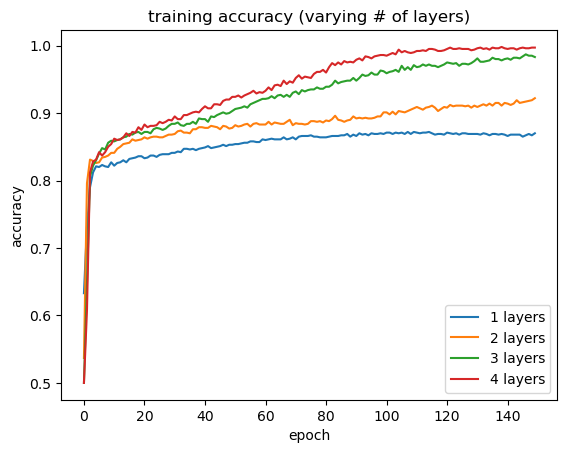

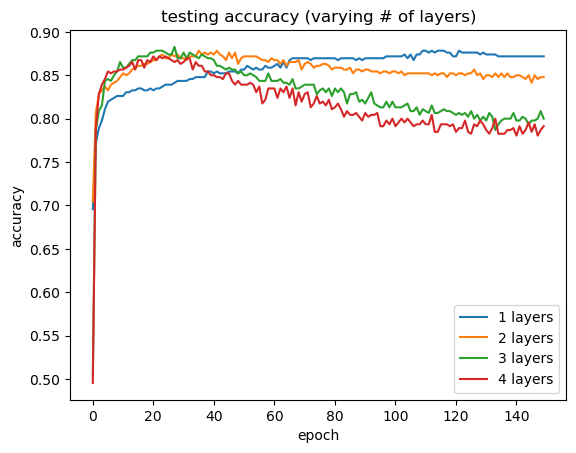

In [ ]:
# plot training accuracy
plt.plot(nn1_train_accuracy)
plt.plot(nn2_train_accuracy)
plt.plot(nn3_train_accuracy)
plt.plot(nn4_train_accuracy)
plt.title('training accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['1 layers','2 layers','3 layers','4 layers'])
plt.show()

# plot testing accuracy
plt.plot(nn1_test_accuracy)
plt.plot(nn2_test_accuracy)
plt.plot(nn3_test_accuracy)
plt.plot(nn4_test_accuracy)
plt.title('testing accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['1 layers','2 layers','3 layers','4 layers'])
plt.show()


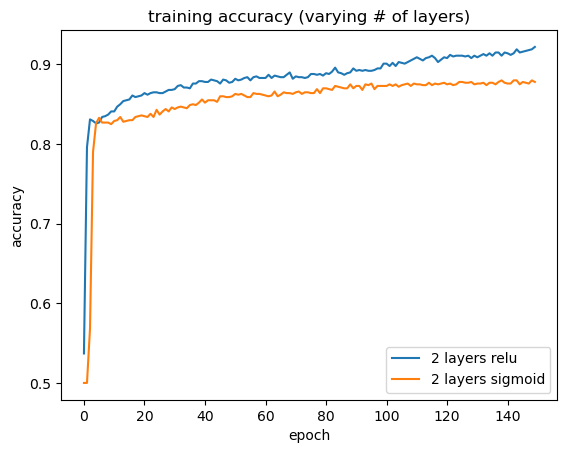

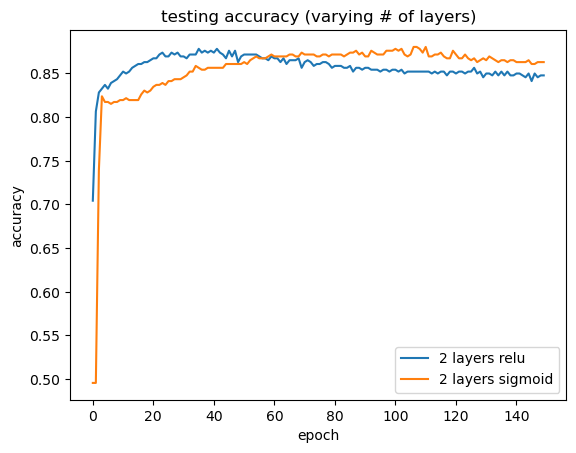

In [ ]:
# plot activation function comparision
plt.plot(nn2_train_accuracy)
plt.plot(nn2_sigmoid_train_accuracy)
plt.title('training accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['2 layers relu', '2 layers sigmoid'])
plt.show()

plt.plot(nn2_test_accuracy)
plt.plot(nn2_sigmoid_test_accuracy)
plt.title('testing accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['2 layers relu', '2 layers sigmoid'])
plt.show()


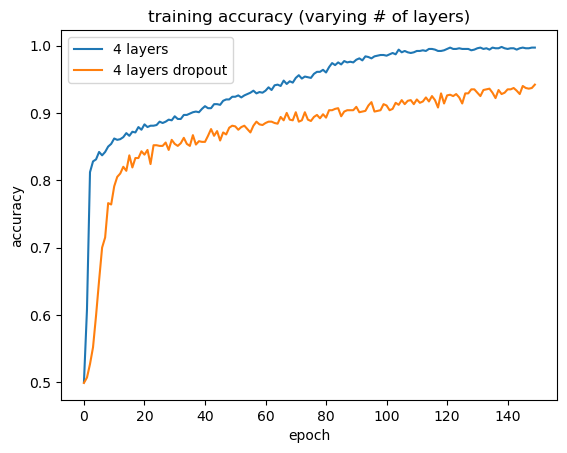

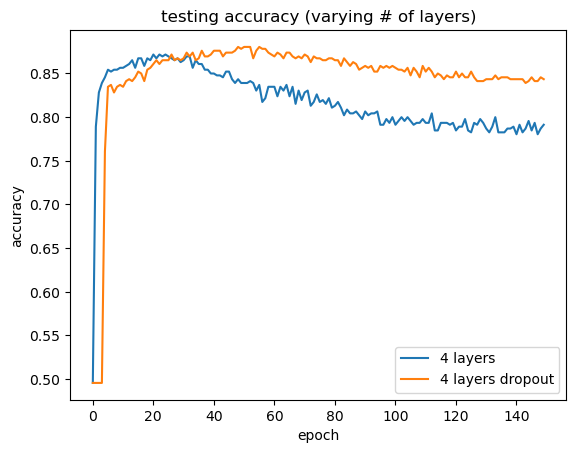

In [ ]:
# plot dropout function comparision
plt.plot(nn4_train_accuracy)
plt.plot(nn4_dropout_train_accuracy)
plt.title('training accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['4 layers', '4 layers dropout'])
plt.show()

plt.plot(nn4_test_accuracy)
plt.plot(nn4_dropout_test_accuracy)
plt.title('testing accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['4 layers', '4 layers dropout'])
plt.show()
